## **Importing the necessary libraries**

In [2]:
# Library used for data manipulation and analysis
import pandas as pd

# Library used for working with arrays
import numpy as np  

# Libraries for visualization
import matplotlib.pyplot as plt  
%matplotlib inline

import seaborn as sns  

# This library contains a large number of probability distributions as well as a growing library of statistical functions
import scipy.stats as stats

## **Binomial Distribution**

### **Q1. A LED bulb manufacturing company regularly conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for LED light bulbs, that the company manufactures is 5%. Suppose a random sample of 10 LED light bulbs is selected. Find the probability distribution for the defective bulbs and answer the following questions.**

In [3]:
p   =  0.05 # Failure rate for LED light bulbs that the company manufactures is 5%

n   =  10 # Sample size

k   =  np.arange(0, 11) # An array of different possible number of defective bulbs

In [4]:
binomial = stats.binom.pmf(k, n, p)

In [5]:
print(binomial)

[5.98736939e-01 3.15124705e-01 7.46347985e-02 1.04750594e-02
 9.64808106e-04 6.09352488e-05 2.67259863e-06 8.03789062e-08
 1.58642578e-09 1.85546875e-11 9.76562500e-14]


**Plotting the binomial distribution**

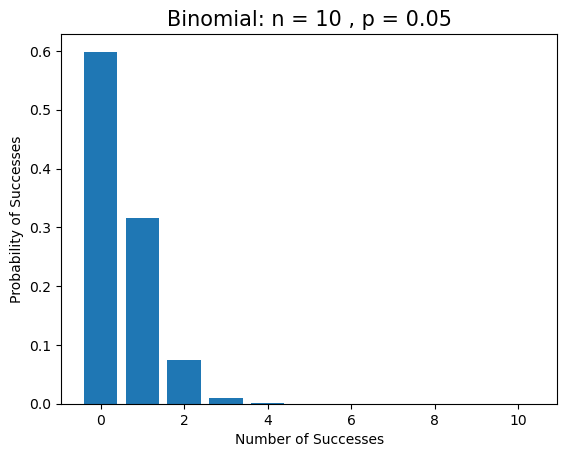

In [6]:
# Plot the distribution
plt.bar(k, binomial)

plt.title('Binomial: n = %i , p = %.2f' % (n, p), fontsize = 15)

plt.xlabel('Number of Successes')

plt.ylabel('Probability of Successes')

plt.show()

**a) What is the probability that none of the LED bulbs are defective?**

In [7]:
print('The probability that none of the LED bulbs are defective is %1.4f' % binomial[0])

The probability that none of the LED bulbs are defective is 0.5987


**b) What is the probability that exactly one LED bulb is defective?**

In [8]:
print('The probability that exactly one LED bulb is defective is %1.4f' % binomial[1])

The probability that exactly one LED bulb is defective is 0.3151


**c) What is the probability that two or fewer LED bulbs are defective?**

**Hint:** We need to calculate the cumulative probability of two or fewer LED bulbs being defective.

In [9]:
cumulative_binomial = stats.binom.cdf(k, n, p)

In [10]:
print('The probability that two or fewer LED bulbs are defective is %1.4f' % cumulative_binomial[2])

The probability that two or fewer LED bulbs are defective is 0.9885


**d) What is the probability that three or more LED bulbs are defective?**

**Hint:** We need to subtract the cumulative probability of up to 2 defective LED bulbs from 1.

In [11]:
P = 1 - cumulative_binomial[2]

print('The probability that three or more LED bulbs are defective is %1.4f' % P)

The probability that three or more LED bulbs are defective is 0.0115


### **Q2. During an NBA game, a basketball player has two foul shots (free throw) and the conversion rate of foul shots is 93%. Find the following probabilities.**

In [12]:
success = 0.93

**a) What is the probability that the player will convert both the shots?**

In [13]:
print('The probability that the player will convert both the shots is', round(stats.binom.pmf(2, 2, 0.93), 4))

The probability that the player will convert both the shots is 0.8649


**b) What is the probability that the player will convert at least one shot?**

In [14]:
print('The probability that the player will convert at least one shot is', round((1 - stats.binom.cdf(0, 2, 0.93)), 4))

The probability that the player will convert at least one shot is 0.9951


### **Q3. Over a long period in a large multinomial corporation, 10% of all sales trainees are rated as outstanding, 75% are rated as excellent, 10% are rated as satisfactory, and 5% are rated as unsatisfactory. Find the following probabilities for a sample of 10 trainees selected at random.**

**a) Two are rated as outstanding**

In [15]:
p = 0.1

n = 10

k = 2

binomial = stats.binom.pmf(k, n, p)

print('Probability that two trainees are rated as outstanding is %1.5f' % binomial )

Probability that two trainees are rated as outstanding is 0.19371


**b) Two or more are rated as outstanding**

In [16]:
p = 0.1

n = 10

k = 1

# To answer this, we need to calculate the cumulative probability  
binomial = stats.binom.cdf(k, n, p)

# Since we have calculated the cumulative probability for 1 or less, we will subtract this prob from 1 for two or more
print('Probability that two or more trainees are rated as outstanding is %1.5f' % (1 - binomial))

Probability that two or more trainees are rated as outstanding is 0.26390


**c) Eight of the ten are rated either outstanding or excellent**

In [17]:
# Probability of excellent or outstanding is 0.75 + 0.10

p = 0.85

n = 10

k = 8

binomial = stats.binom.pmf(k, n, p)

print('Probability that eight out of ten trainees are rated either excellent or outstanding is %1.5f' % binomial)

Probability that eight out of ten trainees are rated either excellent or outstanding is 0.27590


**d) None of the trainees are rated as unsatisfactory**

In [18]:
p = 0.05

n = 10

k = 0

binomial = stats.binom.pmf(k, n, p)

print('Probability that no trainees are rated as unsatisfactory is %1.5f' % binomial )

Probability that no trainees are rated as unsatisfactory is 0.59874


## **Uniform Distribution**

### **Q4. A university records the time taken by students to solve the statistics assignment in 'assignment.csv’. Plot the probability distribution this data follows and answer the following questions.**

### **Loading the dataset**

In [21]:
assignment = pd.read_csv('datasets\\assignment.csv')

assignment.head()

,Student_ID,Time_taken
0,955,2.79
1,379,3.32
2,922,1.35
3,312,2.35
4,670,1.98


Let's plot the histogram of the data along with the PDF of uniform distribution using the parameters - minimum time required and maximum time required for completing the assignment.

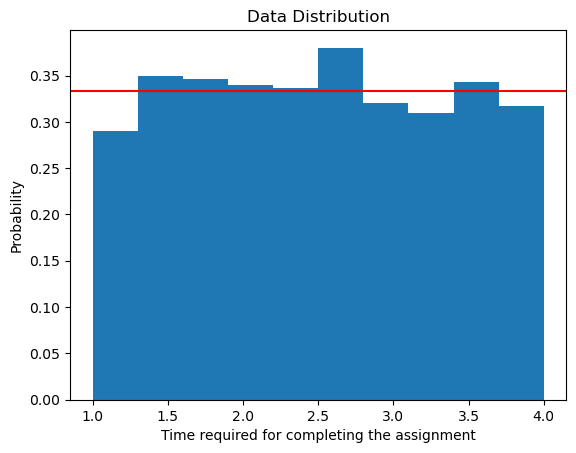

In [22]:
# Visualize the distribution of the time needed for completing the assignment
plt.hist(assignment['Time_taken'], density = True)

plt.axhline(1 / 3, color = 'red')

plt.xlabel('Time required for completing the assignment')

plt.ylabel('Probability')

plt.title('Data Distribution')

plt.show()

**Insight**: The above plot shows that all the values between 1 and 4 have almost equal probability. We are going to use continuous uniform distribution. We need to decide the endpoints. Here, the endpoints are 1 and 4.

X ~ U(1, 4)

In [23]:
# Import the required function
from scipy.stats import uniform

# Use the uniform.pdf() function to generate the probability distribution
x = np.linspace(1, 4, 50)

probs = uniform.pdf(x, loc = 1, scale = 3)

**a) Find the probability that a randomly selected student requires at most 2.5 hours to complete the assignment.**

**CDF** of a random variable (X) is the probability that X will take the value less than or equal to x. Mathematically, it can be represented as:

>$F_X(x) = P(X\leq x)$

In our case, the random variable (X) is the number of hours.

$ P(X\leq 2.5)$

In [24]:
uniform.cdf(x = 2.5, loc = 1, scale = 3)

0.5

**b) Find the probability that a randomly selected student requires at least 3 hours to complete the quiz.**

$ P(X >= 3)$

In [25]:
round(1 - uniform.cdf(x = 3, loc = 1, scale = 3), 4)

0.3333

**c) Find the probability that a randomly selected student requires 1.5 to 3.5 hours to complete the quiz.**

$ P(1.5 <= X <= 3.5)$

In [26]:
round(uniform.cdf(x = 3.5, loc = 1, scale = 3) - uniform.cdf(x = 1.5, loc = 1, scale = 3), 4) 

0.6667

## **Normal Distribution**

### **Q5. According to the Telecommunication Industry, the average monthly cell phone bill is Rs. 850, with a standard deviation of Rs. 150. Assuming that the monthly bill follows a normal distribution, answer the following questions.**

**a) What is the probability that a randomly selected cell phone bill is more than Rs. 1200?**

In [27]:
# To calculate this, we will calculate the cumulative probability for less than 1200 and then will subtract it from 1

round(1 - stats.norm.cdf(1200, loc = 850, scale = 150), 4)

0.0098

**b) What is the probability that a randomly selected cell phone bill is between Rs. 750 and Rs. 1200?**

In [28]:
round(stats.norm.cdf(1200, loc = 850, scale = 150) - stats.norm.cdf(750, loc = 850, scale = 150), 4)

0.7377

**c) What is the probability that a randomly selected cell phone bill is no more than Rs. 650?**

In [29]:
round(stats.norm.cdf(650, loc = 850, scale = 150), 4)

0.0912

**d) What is the amount above which lies the top 15% of cell phone bills?**

Let the amount be $M$. 

$P(X ≥ M) = 0.15$

$=> 1 – P(X < M) = 0.15$

$=> P(X < M) = 0.85$

In [30]:
# To calculate this, we will use the percent point function, i.e., ppf

stats.norm.ppf(0.85, loc = 850, scale = 150)

1005.4650084240685

**e) What is the amount below which lies the bottom 25% of cell phone bills?**

In [31]:
round(stats.norm.ppf(0.25, loc = 850, scale = 150), 4)

748.8265

### **Q6. The mean filling capacity for a Coke bottle is 500 ml with a standard deviation of 20 ml. Assume that it follows a normal distribution and answer the following questions.**

In [32]:
mu = 500

sigma = 20

**a) What is the probability that the bottle filled less than 480 ml of Coke?**

In [33]:
x1 = 480

z1 = (x1 - mu) / sigma

p = stats.norm.cdf(z1)

print ('The probability of bottle filled less than 480 ml is %1.4f' % p)

The probability of bottle filled less than 480 ml is 0.1587


**b) What is the probability that the bottle filled more than 520 ml of Coke?**

In [34]:
x2 = 520

z2 = (x2 - mu) / sigma

p1 = 1 - stats.norm.cdf(z2)

print ('The probability of bottle filled more than 520 ml is %1.4f' % p1)

The probability of bottle filled more than 520 ml is 0.1587


**c) What is the probability that the bottle filled between 470 ml to 525 ml of Coke?**

In [35]:
x3 = 470

z3 = (x3 - mu) / sigma

x4 = 525

z4 = (x4 - mu) / sigma

p2 = stats.norm.cdf(z3)

p3 = stats.norm.cdf(z4)

p4 = p3 - p2

print ('The probability that the bottle filled between 470 ml to 525 ml is %1.4f' %p4)

The probability that the bottle filled between 470 ml to 525 ml is 0.8275


### Q7: **In 2-liter soft drink bottles, the drink filled is normally distributed, with a mean of 2.0 liters and a standard deviation of 0.05 liter. If bottles contain less than 95% of the listed net content (1.90 liters), the manufacturer may be subject to a penalty by the state office of consumer affairs. Bottles that have a net quantity above 2.1 liters may cause excess spillage upon opening. Answer the following questions.**

In [36]:
mu = 2

sigma = 0.05

**a) What is the probability that the bottle content is between 1.9 and 2.0 liters?**

In [37]:
Prob = stats.norm.cdf(2, loc = mu, scale = sigma) - stats.norm.cdf(1.90, loc = mu, scale = sigma)

print("Probability that the bottle content is between 1.9 and 2 liters is %3.4f" % Prob)

Probability that the bottle content is between 1.9 and 2 liters is 0.4772


**b) What is the probability that the bottle content is between 1.9 and 2.1 liters?**

In [38]:
Prob = stats.norm.cdf(2.1, loc = mu, scale = sigma) - stats.norm.cdf(1.9, loc = mu, scale = sigma)

print("Probability that the bottle content is between 1.9 and 2.1 liters is %3.4f" % Prob)

Probability that the bottle content is between 1.9 and 2.1 liters is 0.9545


**c) What is the probability that the bottle content is below 1.9 liters or above 2.1 liters?**

In [39]:
Prob1  =  stats.norm.cdf(1.9, loc = mu, scale = sigma)

Prob2  =  1 - stats.norm.cdf(2.1, loc = mu, scale = sigma)

print("Probability that the bottle content is below 1.9 liters or above 2.1 liters is %3.4f" % (Prob1 + Prob2))

Probability that the bottle content is below 1.9 liters or above 2.1 liters is 0.0455


**d) 99% of the bottles contain at least what amount of soft drink in them?**

In [40]:
Prob = stats.norm.ppf(0.01, loc = mu, scale = sigma)

print("99% of the bottles have at least", round(Prob, 2), "Liters")

99% of the bottles have at least 1.88 Liters


## **Sampling Distribution**

### **Q8. Suppose an automobile battery manufacturer claims that the mean lifetime of their battery is 60 months with a standard deviation of 6 months. Suppose the distribution of battery life is approximately normal. Find the probability that the mean lifetime of 40 randomly sampled batteries will be less than 58 months.**

In [41]:
# Import the required function
from scipy.stats import norm

# Declare the mean lifetime of battery as mu
mu = 60

# Declare the standard deviation of battery as sigma
sigma = 6

# Sample size
n = 40

# Find the sample standard deviation
s = sigma / np.sqrt(40)

# Find the probability
round(norm.cdf(58, loc = mu, scale = s), 4)

0.0175

**Insight:** 

The probability that the mean lifetime of 40 randomly sampled batteries will be less than 58 months is 1.75%.

## **Interval Estimation**

### **Q9. A random sample of 40 households was selected as part of a study on electricity usage, and the number of kilowatt-hours (kWh) was recorded for each household in the sample for the first quarter of 2022. The average usage was found to be 310 kWh. In a very large study in the first quarter of the previous year, it was found that the standard deviation of the usage was 89 kWh.**

### **Assuming the standard deviation is unchanged and that the usage is normally distributed, provide an expression for calculating the 95% confidence interval for the mean usage in the first quarter of 2022.**

In [4]:
# Import the required function
from scipy.stats import norm

import numpy as np

# Set the values of sample mean and sigma
x_bar, sigma = 310, 89

# Set the value of sample size
n = 40

# Construct the confidence interval
np.round(norm.interval(0.95, loc = x_bar, scale = sigma / np.sqrt(n)), 2)

array([282.42, 337.58])

In [6]:

np.round(norm.interval(0.615, loc = 502, scale = 115), 2)

array([402.1, 601.9])

**Insight:** 
 
 95% of the time, the mean usage in the first quarter of 2022 will be in between 282.42 and 337.58 kWh.

## **Hypothesis Testing**

### **Q10. You are the manager of a Chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. State the null and alternative hypothesis.**

The null hypothesis is that the population mean has not changed from its previous value of 4.5 minutes. This is denoted 
as:

$H_0: µ = 4.5$

The alternative hypothesis is the opposite of the null hypothesis. Because the null hypothesis is that the population
mean is 4.5 minutes, the alternative hypothesis is that the population mean is not 4.5 minutes. This is denoted as:

$H_1: µ \neq 4.5$

### **Q11. Find the p-value of a two-tailed hypothesis test if the Z-stat = +2.00?**

In [43]:
# Calculating the p-value for Z-stat = 2
p_val = 1 - stats.norm.cdf(2)

p_val

0.02275013194817921

In [44]:
print("This is a two-tailed test. So, the p_value is twice the p-value for the one-tailed test, i.e., %1.4f" %(p_val * 2))

This is a two-tailed test. So, the p_value is twice the p-value for the one-tailed test, i.e., 0.0455


In [8]:
mu = 1
sigma = .2
n = 35

.2/np.sqrt(n)

0.033806170189140665